In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR

In [37]:
flights_df = pd.read_csv('complete_flight_info_and weather_data.csv')

# convert flight date to date object
flights_df = flights_df.drop(['date', 'date.1','CRS_DEP_TIME','ORIGIN','DEST'], axis=1)

flights_df = flights_df.dropna()
 
flights_df['FL_DATE'] = pd.to_datetime(flights_df['FL_DATE'])
del flights_df['DOT_CODE']
# Remove columns starting with 'origin' and 'dest'
columns_to_remove = [col for col in flights_df.columns if col.startswith('ORIGIN') or col.startswith('DEST')]
flights_df = flights_df.drop(columns=columns_to_remove)

# converts string TRUE/FALSE to boolean
flights_df.replace({'TRUE': True, 'FALSE': False}, inplace=True)

# convert FL_Date to year, month, day
flights_df['FL_YEAR'] = pd.to_datetime(flights_df['FL_DATE']).dt.year
flights_df['FL_MONTH'] = pd.to_datetime(flights_df['FL_DATE']).dt.month
flights_df['FL_DAY'] = pd.to_datetime(flights_df['FL_DATE']).dt.day

# drop original date time
flights_df.drop(columns=['FL_DATE'], inplace=True)


FL_NUMBER                      int64
DEP_TIME                     float64
DEP_DELAY                    float64
TAXI_OUT                     float64
WHEELS_OFF                   float64
CRS_ARR_TIME                   int64
ARR_DELAY                    float64
CRS_ELAPSED_TIME             float64
DISTANCE                       int64
dep_temperature_2m           float64
dep_apparent_temperature     float64
dep_rain                     float64
dep_wind_speed_10m           float64
dep_wind_speed_100m          float64
dep_cloud_cover              float64
dep_cloud_cover_low          float64
dep_cloud_cover_mid          float64
dep_cloud_cover_high         float64
dep_wind_direction_10m       float64
dep_wind_direction_100m      float64
dep_wind_gusts_10m           float64
dep_snow_depth               float64
dest_temperature_2m          float64
dest_apparent_temperature    float64
dest_rain                    float64
dest_wind_speed_10m          float64
dest_wind_speed_100m         float64
d

MSE: 104.99255512799037
MAE: 7.038221953400698
R2: 0.9911889165672368
MAPE: 21.078177232018056
Selected predictors after Lasso:
Index(['FL_NUMBER', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'CRS_ARR_TIME', 'CRS_ELAPSED_TIME', 'DISTANCE', 'dep_cloud_cover',
       'dep_cloud_cover_low', 'dep_wind_direction_10m', 'dest_cloud_cover',
       'dest_cloud_cover_mid', 'dest_cloud_cover_high',
       'dest_wind_direction_10m', 'dest_wind_direction_100m'],
      dtype='object')


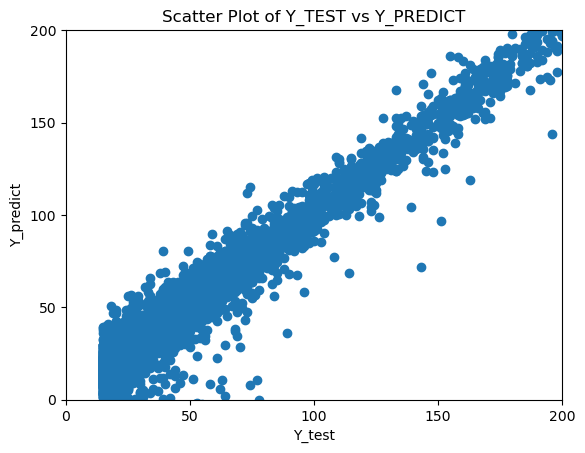

In [43]:
X = flights_df.loc[:, flights_df.columns != 'ARR_DELAY']
y = flights_df['ARR_DELAY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 156, shuffle=True)

model_la = Lasso(alpha=5)

model_la.fit(X_train, y_train)

la_predict_train = model_la.predict(X_train)
la_predict = model_la.predict(X_test)

print('MSE: ' + str(mean_squared_error(la_predict, y_test)))
print('MAE: ' + str(mean_absolute_error(la_predict, y_test)))
print('R2: ' + str(r2_score(la_predict, y_test)))
print('MAPE: ' + str(mean_absolute_percentage_error(y_test, la_predict)))

# Get the coefficients of the Lasso model
lasso_coefficients = model_la.coef_

# Find the indices of non-zero coefficients
nonzero_indices = np.where(lasso_coefficients != 0)[0]
selected_predictors = X_train.columns[nonzero_indices]

print("Selected predictors after Lasso:")
print(selected_predictors)

# Create the scatter plot
plt.scatter(y_test, la_predict)

plt.xlabel('Y_TEST'.capitalize())
plt.xticks([0, 50, 100, 150, 200], ['0', '50', '100', '150', '200'])

plt.ylabel('Y_PREDICT'.capitalize())
plt.yticks([0, 50, 100, 150, 200], ['0', '50', '100', '150', '200'])

plt.xlim([0, 200])
plt.ylim([0, 200])

plt.title('Scatter Plot of Y_TEST vs Y_PREDICT')

plt.show()

MSE: 102.86011497078758
MAE: 6.994472377110874
R2: 0.9913788740083241
MAPE: 21.03510561025231


(0.0, 200.0)

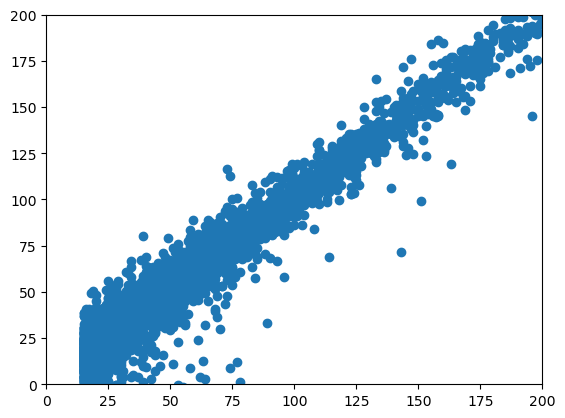

In [28]:
X = flights_df[['DEP_DELAY', 'TAXI_OUT', 'CRS_ELAPSED_TIME', 'DISTANCE', 'FL_NUMBER', 'FL_YEAR', 'dest_cloud_cover', 'DEP_TIME', 'dep_temperature_2m', 'dest_wind_direction_100m', 'dest_snow_depth', 'dest_rain', 'CRS_ARR_TIME', 'dest_wind_gusts_10m', 'dest_wind_speed_100m', 'dest_wind_speed_10m', 'WHEELS_OFF', 'dest_cloud_cover_high', 'dep_apparent_temperature', 'dep_wind_direction_10m', 'dep_cloud_cover_mid', 'dest_cloud_cover_mid', 'dep_snow_depth', 'FL_DAY', 'dest_wind_direction_10m']]
y = flights_df['ARR_DELAY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 156, shuffle=True)

lm = LinearRegression()
lm.fit(X_train, y_train)

lm_predict = lm.predict(X_test)
print('MSE: ' + str(mean_squared_error(lm_predict, y_test)))
print('MAE: ' + str(mean_absolute_error(lm_predict, y_test)))
print('R2: ' + str(r2_score(lm_predict, y_test)))
print('MAPE: ' + str(mean_absolute_percentage_error(y_test, lm_predict)))

plt.scatter(y_test, lm_predict)
plt.xlim([0, 200])
plt.ylim([0, 200])

In [42]:
X = flights_df[ ['DEP_DELAY', 'TAXI_OUT', 'CRS_ELAPSED_TIME', 'DISTANCE', 'FL_NUMBER', 'FL_YEAR', 'dest_cloud_cover', 'DEP_TIME', 'dep_temperature_2m', 'dest_snow_depth']]
y = flights_df['ARR_DELAY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 156, shuffle=True)

svr_rbf = SVR(kernel='rbf')

svr_rbf.fit(X_train, y_train)

svr_predict = svr_rbf.predict(X_test)

print('MSE: ' + str(mean_squared_error(svr_predict, y_test)))
print('MAE: ' + str(mean_absolute_error(svr_predict, y_test)))
print('R2: ' + str(r2_score(svr_predict, y_test)))

MSE: 10185.877427845573
MAE: 41.55979860667354
R2: -59.46343810187049


In [14]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100